In [ ]:
from code.src.AnniesLasso.thecannon.vectorizer.polynomial import PolynomialVectorizer
from code.src.AnniesLasso.thecannon.model import CannonModel
from code.src.sfh import SFH
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

/home/vmehta/honours-project/pyght/src/AnniesLasso/thecannon/vectorizer/polynomial.py:134: SyntaxWarning: invalid escape sequence '\c'
  if giving LaTeX label definitions one may want to use '\cdot' for
/home/vmehta/honours-project/pyght/src/AnniesLasso/thecannon/vectorizer/polynomial.py:303: SyntaxWarning: invalid escape sequence '\c'
  if giving LaTeX label definitions one may want to use '\cdot' for
/home/vmehta/honours-project/pyght/src/AnniesLasso/thecannon/vectorizer/polynomial.py:346: SyntaxWarning: invalid escape sequence '\c'
  if giving LaTeX label definitions one may want to use '\cdot' for
/home/vmehta/honours-project/pyght/src/AnniesLasso/thecannon/plot.py:137: SyntaxWarning: invalid escape sequence '\c'
  label_names=label_names, mul='\cdot', pow='^')


In [2]:
filepath = '/avatar/vmehta/sfh_100_20260129_104132/sfh_100_20260129_104132'
labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

data = fits.getdata(f"{filepath}_labels.fits")
data = np.log10(data)

flux = np.load(f"{filepath}_snr_spectra.npy", allow_pickle=True)
ivar = np.load(f"{filepath}_snr_invvar.npy", allow_pickle=True)
wav = np.load(f"{filepath}_wavelength.npy", allow_pickle=True)
spec = np.load("/home/vmehta/honours-project/pyght/data/sfh_binned_spectra.npy")

vectorizer = PolynomialVectorizer(labels, 2)

In [3]:
model = CannonModel(data, flux, ivar, vectorizer=vectorizer, dispersion=wav)

model.train()
#model.write('model.pkl')

2026-02-10 14:27:29,411 [INFO] Training 10-label CannonModel with 100 stars and 1667 pixels/star
stty: 'standard input': Inappropriate ioctl for device
2026-02-10 14:27:29,422 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[==========================                                                                          ]  25% (417/1667)                          

2026-02-10 14:27:30,285 [WARNING] Optimization warning (l_bfgs_b): ABNORMAL: 


[========================================================================================================] 100% (3s)                                 


(array([[ 9.96834097e-01, -6.84485143e-03, -3.84875334e-03, ...,
         -6.66388344e-04,  2.50834952e-03,  1.36420558e-03],
        [ 1.00699791e+00, -3.08724162e-02,  5.90568346e-03, ...,
          2.01558918e-03, -9.90727325e-04,  4.22273365e-03],
        [ 1.00585406e+00, -2.59562770e-02,  7.84930517e-03, ...,
          1.72388440e-03, -2.53032319e-03,  2.39855406e-03],
        ...,
        [ 9.95893966e-01, -2.11404947e-02,  7.26479995e-03, ...,
          2.00848663e-03, -3.54028006e-03,  2.28850110e-03],
        [ 9.99796122e-01, -2.73146131e-02,  8.21369475e-03, ...,
          2.20608643e-03, -4.10332274e-03,  2.66244361e-03],
        [ 1.00626591e+00, -3.44005521e-02,  7.74923758e-03, ...,
          2.19278849e-03, -3.66539522e-03,  2.81671519e-03]],
       shape=(1667, 66)),
 array([0., 0., 0., ..., 0., 0., 0.], shape=(1667,)),
 [{'grad': array([-5.56749322e-08, -2.64286325e-08, -1.01986054e-07, -1.43539968e-08,
           1.20349053e-07,  2.41236000e-08,  2.33228075e-08,  2.

In [4]:
def moving_average(x, w):
        """Returns the moving average of the input array."""
        return np.convolve(x, np.ones(w), 'same') / w

In [5]:
spec

array([[9.26245827e-14, 9.31786715e-14, 9.32051528e-14, ...,
        7.31386641e-14, 7.32956352e-14, 7.36272672e-14],
       [1.34272256e-14, 1.38696748e-14, 1.39350067e-14, ...,
        1.94973255e-14, 1.96016303e-14, 1.97269766e-14],
       [7.24229836e-15, 7.44478820e-15, 7.41087941e-15, ...,
        1.21395523e-14, 1.22234521e-14, 1.23318603e-14],
       ...,
       [8.75809813e-17, 9.03595162e-17, 8.78477435e-17, ...,
        3.10521064e-16, 3.20543294e-16, 3.27933266e-16],
       [6.07403689e-17, 6.24823176e-17, 6.05919348e-17, ...,
        2.28278506e-16, 2.36219334e-16, 2.41768768e-16],
       [4.06673695e-17, 4.18304636e-17, 4.05712707e-17, ...,
        1.64654157e-16, 1.70821073e-16, 1.74879775e-16]], shape=(10, 1667))

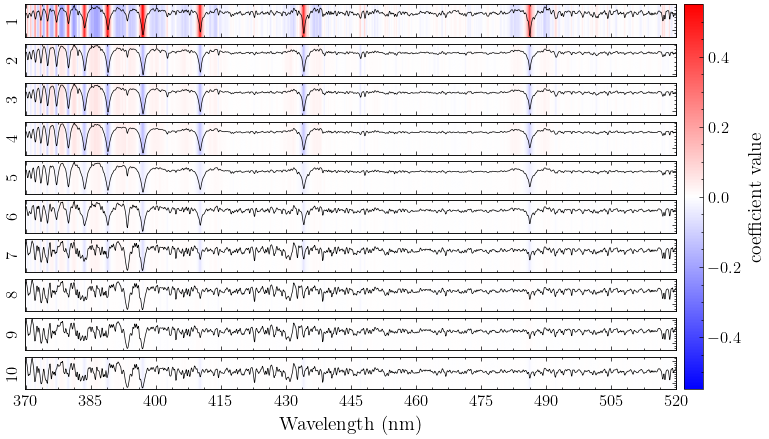

In [6]:
# Combined heatmap + overlaid normalized spectra (aligned and not flipped)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('thesis')

# Build heatmap from linear terms
linear_terms = model.theta[:, 1:11]
arr = linear_terms.T  # shape: (n_labels, n_pixels)
n_labels, n_pix = arr.shape

# Consistent color scale across all subplots
v = np.nanmax(np.abs(arr)) if np.isfinite(arr).any() else 1.0

fig, axes = plt.subplots(n_labels, 1, figsize=(10, 0.5*n_labels), sharex=True)
if n_labels == 1:
    axes = [axes]
    
def normalize(v):
    s_flat = v / moving_average(v, 100)
    return s_flat * moving_average(np.ones_like(s_flat), 100) - 1  # dealing with edges

norm_vals = [normalize(v) for v in spec]
# Draw heatmaps
for i in range(n_labels):
    im = axes[i].imshow(arr[i:i+1, :], aspect='auto', cmap='bwr', vmin=-v, vmax=v)
    
    # Create secondary y-axis for spectrum
    ax2 = axes[i].twinx()
    ax2.plot(norm_vals[i], 'k', linewidth=0.5)
    ax2.tick_params(axis='y', labelright=False)
    
    try:
        axes[i].set_ylabel(str(labels[i]), fontsize=12)
    except Exception:
        axes[i].set_ylabel(f"Row {i+1}")
    
    axes[i].set_xticks([])
    axes[i].set_yticks([])

axes[-1].set_xlabel('Wavelength (nm)')
axes[-1].set_xticks(np.linspace(0, n_pix - 1, 11))
axes[-1].set_xticklabels(['370','385','400','415','430','445','460','475','490','505','520'])

# Single colorbar for all subplots on the right
cbar = fig.colorbar(im, ax=axes, orientation='vertical', location='right', pad=0.01)
cbar.set_label('coefficient value')
plt.show()

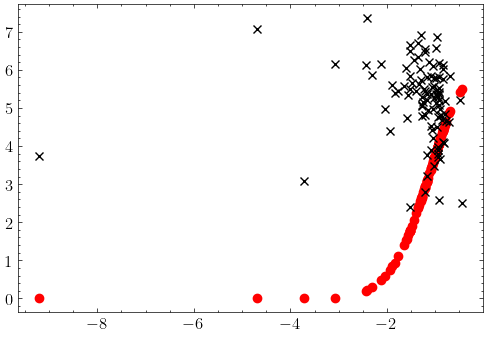

In [7]:
def get_terms(label, wavelength_idx):
    const = model.theta[wavelength_idx, 0]
    linear = model.theta[wavelength_idx, int(label)]
    
    def quad_theta_index(a, b, n_labels=10):
        a, b = sorted((int(a), int(b)))
        offset = (a - 1) * (n_labels + 1) - (a - 1) * a // 2 + (b - a)
        return 1 + n_labels + offset
    
    idx_sq = quad_theta_index(label, label, n_labels=10)
    quad = model.theta[wavelength_idx, idx_sq]
    
    return const, linear, quad

def f(label, wavelength_idx,x):
    const, linear, quad = get_terms(label, wavelength_idx)
    return const + linear*x + quad*x**2

l4 = model.training_set_labels.T[3]
f301 = model.training_set_flux.T[301]

const = model.theta[301, 0]
linear = model.theta[301, 4]

def quad_theta_index(a, b, n_labels=10):
    a, b = sorted((int(a), int(b)))
    offset = (a - 1) * (n_labels + 1) - (a - 1) * a // 2 + (b - a)
    return 1 + n_labels + offset

quad = model.theta[301, quad_theta_index(4, 4, n_labels=10)]

plt.figure(figsize=(6,4))
plt.tight_layout()
plt.plot(l4, 10**(f(4, 301, l4)), 'ro')
plt.plot(l4, 10**(f301),'kx')
plt.show()

In [8]:
def get_all_theta_indices_for_label(label, n_labels=10):
    """
    Find all theta indices that involve a given label.
    
    For degree-2 polynomial:
    - theta[0]: constant
    - theta[1:n_labels+1]: linear terms for each label
    - theta[n_labels+1:]: quadratic terms (all pairs i,j where i <= j)
    """
    def quad_theta_index(a, b, n_labels=10):
        a, b = sorted((int(a), int(b)))
        offset = (a - 1) * (n_labels + 1) - (a - 1) * a // 2 + (b - a)
        return 1 + n_labels + offset
    
    indices = {}
    
    # Linear term
    indices['linear'] = label
    
    # Quadratic terms: label paired with all other labels
    indices['quadratic'] = []
    for other_label in range(1, n_labels + 1):
        idx = quad_theta_index(label, other_label, n_labels)
        indices['quadratic'].append((label, other_label, idx))
    
    return indices

RMS difference (full model vs training flux): 9.479852


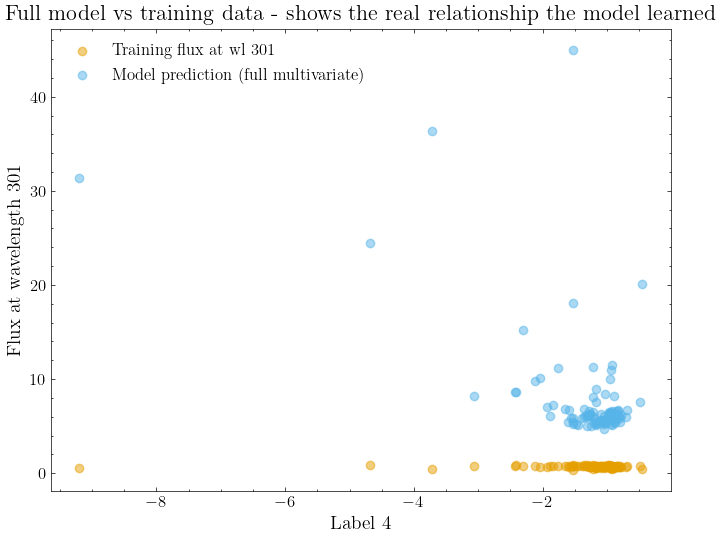

In [9]:

# IMPORTANT: Your current f() function only includes l4 linear + quadratic in l4
# But the model learned: f(l1, l2, ..., l10) = const + sum_i(linear_i * l_i) + sum_i,j(quad_i,j * l_i * l_j)

# The cross terms matter! For example:
# theta[301, 23] * l4 * l2
# If l4 and l2 are correlated in your training data, ignoring l2 means you're missing part of the effect

# To understand what the model learned about label 4, you need to either:

# OPTION 1: Include all the cross-product terms in your prediction
def f_full(wavelength_idx, labels_row):
    """Full multivariate polynomial prediction for a single wavelength"""
    def quad_theta_index(a, b, n_labels=10):
        a, b = sorted((int(a), int(b)))
        offset = (a - 1) * (n_labels + 1) - (a - 1) * a // 2 + (b - a)
        return 1 + n_labels + offset
    
    n_labels = 10
    pred = model.theta[wavelength_idx, 0]  # constant
    
    # Linear terms
    for i in range(n_labels):
        pred += model.theta[wavelength_idx, i+1] * labels_row[i]
    
    # Quadratic terms
    for i in range(n_labels):
        for j in range(i, n_labels):
            idx = quad_theta_index(i+1, j+1, n_labels)
            pred += model.theta[wavelength_idx, idx] * labels_row[i] * labels_row[j]
    
    return pred

# Test: compare f_full vs actual training flux
predictions_full = np.array([f_full(301, model.training_set_labels[i]) for i in range(len(model.training_set_labels))])
actual_flux = model.training_set_flux.T[301]

print(f"RMS difference (full model vs training flux): {np.sqrt(np.mean((predictions_full - actual_flux)**2)):.6f}")

# Now plot both
plt.figure(figsize=(8, 6))
plt.scatter(l4, actual_flux, alpha=0.5, label='Training flux at wl 301')
plt.scatter(l4, predictions_full, alpha=0.5, label='Model prediction (full multivariate)')
plt.xlabel('Label 4')
plt.ylabel('Flux at wavelength 301')
plt.legend()
plt.title('Full model vs training data - shows the real relationship the model learned')
plt.show()

In [10]:
pred_labels = np.load('/avatar/vmehta/sfh_100_20260129_104132/snr_all_pred.npy')
true_labels = np.load('/avatar/vmehta/sfh_100_20260129_104132/snr_all_true.npy')

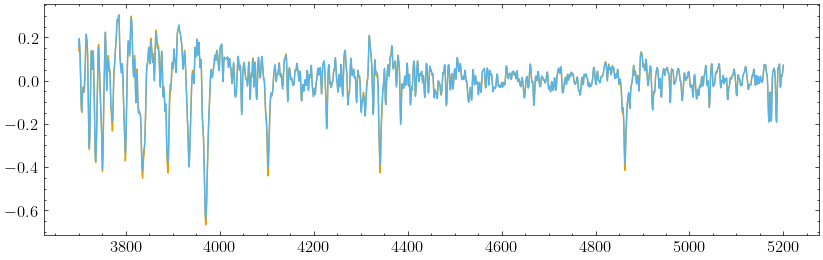

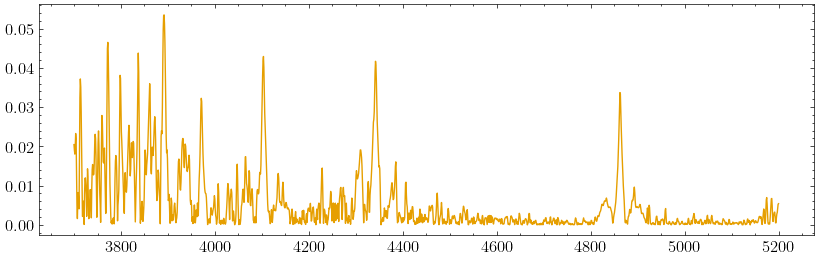

In [11]:
n = 0

pred = 10**(np.vstack(pred_labels)[n])
true = 10**(np.vstack(true_labels)[n])

pred_spec = pred @ norm_vals
true_spec = true @ norm_vals

plt.figure(figsize=(10,3))
plt.plot(wav, pred_spec)
plt.plot(wav, true_spec)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(wav, np.abs(pred_spec-true_spec))

<BarContainer object of 10 artists>

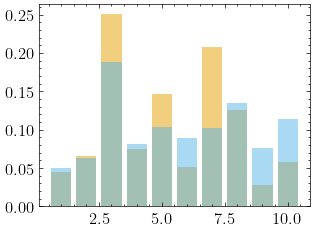

In [12]:
plt.figure()
plt.bar(np.arange(1,11),pred, alpha=0.5)
plt.bar(np.arange(1,11),true, alpha=0.5)